# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from citipy import citipy
from api_keys import weather_api_key
from random import uniform

## Generate Cities List

In [29]:
cities = []
while len(cities) < 501:
    random_lat = uniform(-90,90)
    random_lng = uniform(-180, 180)
    city= citipy.nearest_city(random_lat, random_lng).city_name
    if city not in cities:    
        cities.append(city)
print(len(cities))  

501


In [30]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" 
query_url = url + weather_api_key


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
wind = []
lat = []
lon = []
temp_max = []
humidity = []
cloudiness = []
country = []
valid_cities = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" 
query_url = url + weather_api_key

for city in cities:
    try:
        print(f"Currently processing {city}")
        city_url = query_url + "&q=" + city
        response = requests.get(city_url).json()
        wind.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        valid_cities.append(city)
    except:
        print(f"Error processing {city}.")

Currently processing kavieng
Currently processing bethel
Currently processing punta arenas
Currently processing galiwinku
Error processing galiwinku.
Currently processing pervomayskoye
Currently processing rikitea
Currently processing weligama
Currently processing kapaa
Currently processing cape town
Currently processing atuona
Currently processing hasaki
Currently processing lata
Currently processing kabin buri
Currently processing amderma
Error processing amderma.
Currently processing sentyabrskiy
Error processing sentyabrskiy.
Currently processing krasnoselkup
Currently processing belushya guba
Error processing belushya guba.
Currently processing varberg
Currently processing ushuaia
Currently processing bonthe
Currently processing bluff
Currently processing avarua
Currently processing mataura
Currently processing fort nelson
Currently processing eureka
Currently processing luderitz
Currently processing contai
Currently processing olymskiy
Error processing olymskiy.
Currently process

Currently processing naranjal
Currently processing tombouctou
Currently processing tucurui
Currently processing illoqqortoormiut
Error processing illoqqortoormiut.
Currently processing khandyga
Currently processing ndele
Currently processing tiquisio
Currently processing sakakah
Currently processing esso
Currently processing lazaro cardenas
Currently processing kampot
Currently processing kruisfontein
Currently processing baishishan
Currently processing camocim
Currently processing queretaro
Currently processing tura
Currently processing bonavista
Currently processing arauco
Currently processing ostrovnoy
Currently processing paraiso
Currently processing berlevag
Currently processing anisoc
Currently processing nizhneyansk
Error processing nizhneyansk.
Currently processing yulara
Currently processing skibbereen
Currently processing santa maria
Currently processing tsiroanomandidy
Currently processing pingliang
Currently processing bouna
Currently processing hilo
Currently processing ye

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
 df = pd.DataFrame({"City": valid_cities,
                "Lat": lat,
                "Lng": lon,
                "Max temp": temp_max,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": wind,
                "Country": country,
                })
df.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country
0,kavieng,-2.57,150.80,82.63,69,2,7.76,PG
1,bethel,41.37,-73.41,69.01,72,1,3.80,US
2,punta arenas,-53.15,-70.92,50.00,61,75,27.51,CL
3,pervomayskoye,43.92,46.71,69.12,60,0,10.40,RU
4,rikitea,-23.12,-134.97,72.14,80,54,11.68,PF


In [40]:
df.to_csv("CityWeather.csv", index=False, header=True)

In [41]:
df.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,19.170065,20.797896,67.171171,67.919740,50.652928,8.246464
std,33.535600,90.393801,17.805907,21.949251,37.953188,5.960840
min,-54.800000,-175.200000,20.170000,8.000000,0.000000,0.160000
25%,-8.840000,-58.620000,53.600000,58.000000,12.000000,4.000000
50%,20.930000,20.650000,70.830000,73.000000,53.000000,6.710000
75%,47.670000,102.500000,80.600000,84.000000,90.000000,11.180000
max,78.220000,179.320000,110.950000,100.000000,100.000000,39.150000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

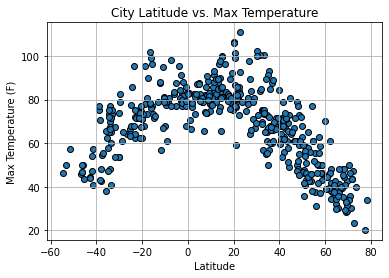

In [49]:
plt.scatter(df["Lat"], df["Max temp"], edgecolors="black")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("City Latitude vs. Max Temperature.png")

## Latitude vs. Humidity Plot

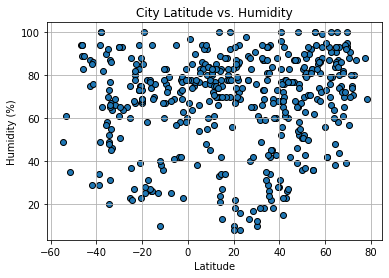

In [50]:
plt.scatter(df["Lat"], df["Humidity"], edgecolors="black")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("City Latitude vs. Humidity.png")

## Latitude vs. Cloudiness Plot

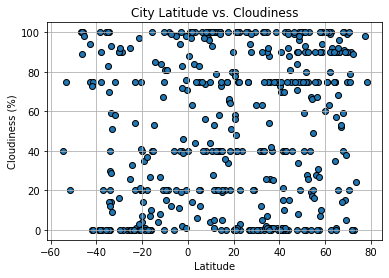

In [51]:
plt.scatter(df["Lat"], df["Cloudiness"], edgecolor="black")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("City Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

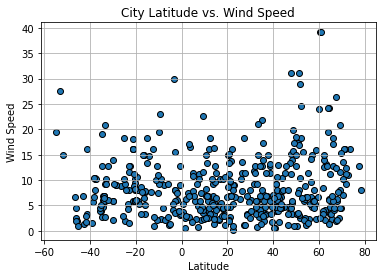

In [55]:
plt.scatter(df["Lat"], df["Wind Speed"], edgecolor="black")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

plt.savefig("City Latitude vs. Wind Speed.png")

## Linear Regression

In [63]:
northen_hemisphere = df.loc[df["Lat"] >=0,:]
northen_hemisphere.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country
1,bethel,41.37,-73.41,69.01,72,1,3.80,US
3,pervomayskoye,43.92,46.71,69.12,60,0,10.40,RU
5,weligama,5.97,80.42,78.84,86,100,5.95,LK
6,kapaa,22.08,-159.32,80.60,78,75,16.11,US
9,hasaki,35.73,140.83,68.00,94,75,17.22,JP


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7022744718745065


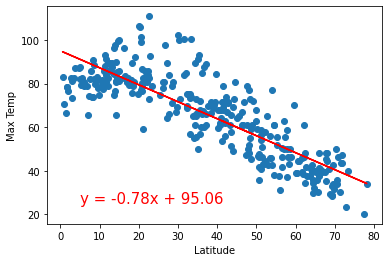

In [78]:
# Print out the r-squared value along with the plot.
x_values = northen_hemisphere["Lat"]
y_values = northen_hemisphere["Max temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [79]:
southern_hemisphere = df.loc[df["Lat"] < 0,:]
southern_hemisphere.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country
0,kavieng,-2.57,150.80,82.63,69,2,7.76,PG
2,punta arenas,-53.15,-70.92,50.00,61,75,27.51,CL
4,rikitea,-23.12,-134.97,72.14,80,54,11.68,PF
7,cape town,-33.93,18.42,77.00,31,0,6.93,ZA
8,atuona,-9.80,-139.03,77.61,76,15,19.57,PF


The r-squared is: 0.5209571842371694


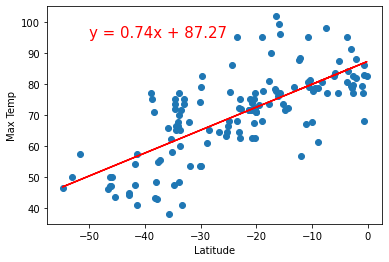

In [82]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,95),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011583637917421032


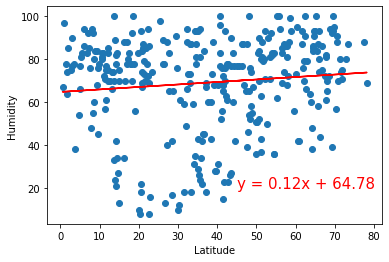

In [85]:
x_values = northen_hemisphere["Lat"]
y_values = northen_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011446238123801524


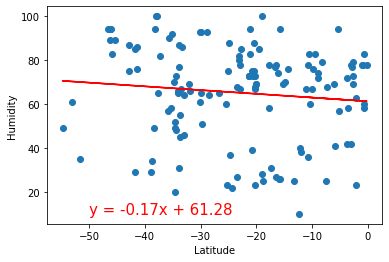

In [88]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0017582493429440667


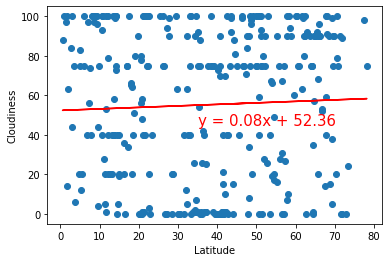

In [95]:
x_values = northen_hemisphere["Lat"]
y_values = northen_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008181176151736155


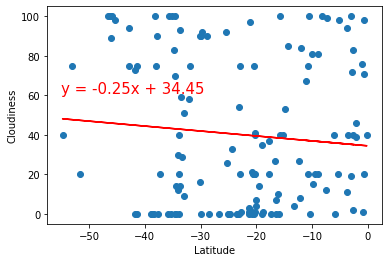

In [103]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,61),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04541441014095687


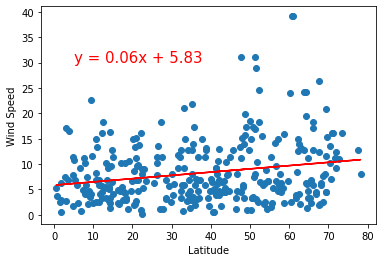

In [98]:
x_values = northen_hemisphere["Lat"]
y_values = northen_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 1.4703548377927139e-06


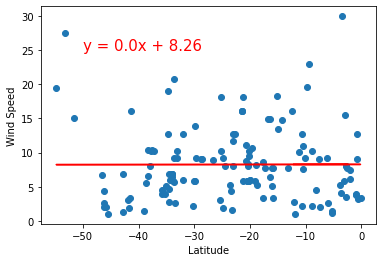

In [106]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")